* **`Lab-04: Working With Logistic Regression with Diabetes Dataset`**

*	`Problem: The Ministry of Health is working to reduce the increasing burden of Type-2 Diabetes Mellitus (T2DM). Health centers across four countries are collecting patient health data to identify people at high risk. A public health research team wants to build a Logistic Regression model that predicts whether a patient is diabetic (1) or non-diabetic (0) using routinely collected data.`

* Using Logistic Regression, build a model to predict whether a patient has diabetes based on the clinical features in the dataset.

•	`Dataset Description:`

| **Variable**             | **Description**                        |
| ------------------------ | -------------------------------------- |
| Pregnancies              | Number of times pregnant (for females) |
| Glucose                  | Plasma glucose concentration           |
| BloodPressure            | Diastolic blood pressure               |
| SkinThickness            | Triceps skinfold thickness             |
| Insulin                  | Serum insulin level                    |
| BMI                      | Body Mass Index                        |
| DiabetesPedigreeFunction | Family diabetes history score          |
| Age                      | Patient age (years)                    |
| Outcome                  | 1 = diabetic, 0 = non-diabetic         |




`Step-1: Import pandas Labraries`

In [14]:
import pandas as pd

`Step-2: Load dataset`

In [15]:
dt=pd.read_csv("diabetes.csv")

`Step-3: Dataset description/Quck data check`

In [16]:
#1.display all dataset
dt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [17]:
#2.display head
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
#3. display the shape of dataset
dt.shape

(768, 9)

In [19]:
#4.display the information
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [20]:
#5.describe the dataset
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
#6.checking missing value
dt.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [22]:
#show the distribution of values in the "Outcome" column of the dataset
print("Outcome value counts:\n", dt["Outcome"].value_counts())

Outcome value counts:
 Outcome
0    500
1    268
Name: count, dtype: int64


NB: `**value_counts() **`shows class imbalance — if one class much smaller, use stratified split and class-weight or resampling.
*   Note:
    * dt["Outcome"] selects the "Outcome" column from the DataFrame.
    * .value_counts() counts how many times each unique value appears in that column.
    * print() displays the results with a label

`Step-4: Exploratory Data Analysis (brief)`

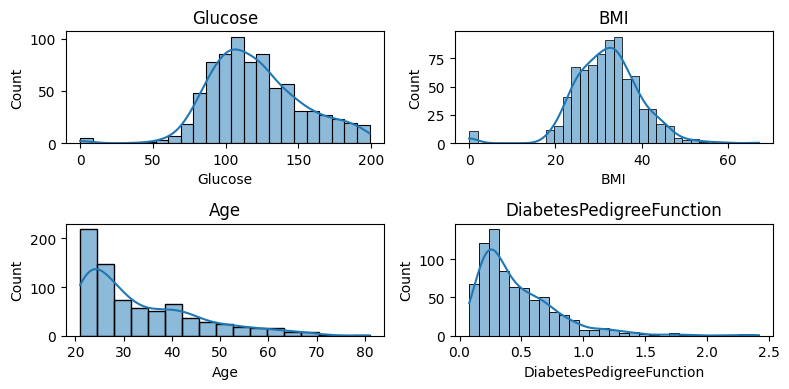

In [23]:
#import labraries
import matplotlib.pyplot as plt
import seaborn as sns
# Example: distribution of important features
plt.figure(figsize=(8,4))
for i, col in enumerate(["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]):
    plt.subplot(2,2,i+1)
    sns.histplot(dt[col].dropna(), kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

*   `Note:Descriptions of each line of code`
1.   `import seaborn as sns`
*   `import matplotlib.pyplot as plt`
    * seaborn (sns): A Python library for creating statistical and visually appealing plots.
    * matplotlib.pyplot (plt): Core plotting library for Python, used for creating figures, subplots, and customizing plots.
2.   `Set figure size`
    * Creates a new figure (or plotting canvas).
    * figsize=(8,4) specifies the width as 8 inches and height as 4 inches.
3.    `Loop over features to create subplots`
    * for i, col in enumerate(["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]):
    * enumerate([...]) loops through the list of column names.
     * i → index (0,1,2,3)
     * col → column name (e.g., "Glucose")
4.   `Create a subplot for each feature`
    * plt.subplot(2,2,i+1)
    * Divides the figure into a 2×2 grid (2 rows × 2 columns).
    * i+1 selects the current subplot position (1 to 4).
5. `Plot histogram with KDE`
    * sns.histplot(dt[col].dropna(), kde=True)
    * dt[col] selects the column from the DataFrame.
    * .dropna() removes any missing values to avoid errors.
    * sns.histplot(..., kde=True):
    * Plots a histogram of the column values.
    * kde=True overlays a smoothed curve (Kernel Density Estimate) showing the data distribution.
* `  Why kde?`
    * It’s a way to estimate the probability density function of a continuous variable.
    * Instead of showing counts in discrete bins (like a histogram), KDE produces a smooth curve that represents the data distribution.
   * Helps to visualize the shape, peak, and spread of the data more clearly.
 6. `Set subplot title`
    * plt.title(col)
    * Adds the column name as the title of the subplot, so each plot is labeled.
7. `Adjust layout`
    * plt.tight_layout()
    * Automatically adjusts spacing between subplots so that titles, labels, and axes do not overlap.
8. `Display the plots`
    * plt.show()
    * Renders and displays all the subplots created above.

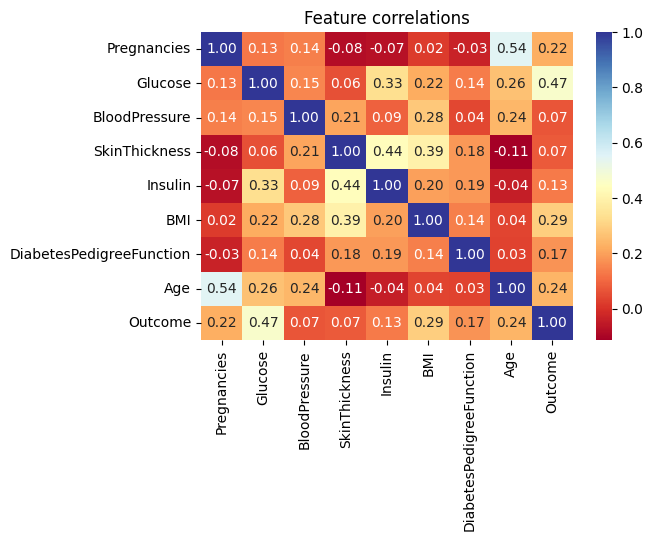

In [24]:
# Correlations
plt.figure(figsize=(6,4))
sns.heatmap(dt.corr(), annot=True, fmt=".2f", cmap="RdYlBu")
plt.title("Feature correlations")
plt.show()

*   Note:
`1. Create a new figure`
    * plt.figure(figsize=(6,4))
    * Creates a new plotting canvas for the heatmap.
    * figsize=(6,4) sets the figure size: 6 inches wide, 4 inches tall.
`2. Plot the correlation heatmap`
    * sns.heatmap(dt.corr(), annot=True, fmt=".2f", cmap="RdYlBu")
       * dt.corr() computes the correlation matrix for all numeric columns in the DataFrame dt.
    * Correlation values range from -1 to 1, showing how strongly two variables are linearly related.
    * Positive correlation → both increase together, negative → one increases while the other decreases.
    * sns.heatmap(...) creates a heatmap to visualize the correlation matrix.
* `Parameters explained:`
    * annot=True → displays the numeric correlation values on the heatmap.
    * fmt=".2f" → formats the numbers to 2 decimal places.
    * cmap="RdYlBu" → uses a Red-Yellow-Blue color scheme:
    * Red → strong negative correlation
    * Yellow → weak or no correlation
   * Blue → strong positive correlation
3. `Add a title`
    * plt.title("Feature correlations")
    * Adds a descriptive title above the heatmap.
4. Show the plot
    * plt.show()
    * Renders and displays the heatmap figure.


*   Key points:
*   `What is: Correlation `is a statistical measure that describes the strength and direction of a relationship between two variables.
*  `Range of values`
    * Correlation coefficients usually range from -1 to 1.
    * +1 → Perfect positive correlation (both variables increase together)
    * 0 → No correlation (variables are not linearly related)
    * -1 → Perfect negative correlation (one variable increases, the other decreases)
* `Positive correlation`
    * As one variable increases, the other tends to increase too.
    * Example: Height and weight often have a positive correlation.
* `Negative correlation`
    * As one variable increases, the other tends to decrease.
    * Example: Hours spent watching TV and exam scores may have a negative correlation (more TV, lower scores).
* `No correlation`
    * No linear relationship exists between the two variables.
    * Example: Shoe size and IQ might have little to no correlation.
*  `Note: In Machine learning`
    * Correlation is used to identify relationships between features.
    * Highly correlated features may be redundant, which can affect model performance.
    * Helps in feature selection, understanding patterns, and predicting outcomes.

`Step-5: Features Selection`

In [25]:
#Select Features (X) and Target (y)
X=dt.drop("Outcome",axis=1)
y=dt["Outcome"]

* `Explanation:`
*   X = dt.drop("Outcome", axis=1)

    * dt is your full dataset (DataFrame).
    * drop("Outcome", axis=1) removes the column Outcome from the dataset.
    * This leaves only the input features (such as Glucose, BMI, BloodPressure, etc.).
    * So X contains all feature columns used to train the model.
2. y = dt["Outcome"]
    * This selects only the Outcome column.
    * Outcome is the target variable the model tries to predict:
    * 0 = Non-diabetic
    * 1 = Diabetic
    * So y contains only the label/output.

*   `Note: Why Feature Selection:`
    * Feature Selection is the process of selecting only the most relevant features from your dataset and removing the irrelevant, redundant, or noisy ones.
*   `Why Feature Selection Is Important`
     1. Improves Model Accuracy
        * Unnecessary features add noise and reduce performance.
     2. Reduces Overfitting
        * By keeping only important features, the model generalizes better.
    3. Speeds Up Training
        * Fewer features → faster training & prediction.
    4. Makes the Model Simpler
       * Easier to interpret and understand.
    5. Reduces Storage and Computation Cost

`Step-6: Split data into Train-Test Split` --> apply _stratified

In [27]:
# import labraries
from sklearn.model_selection import train_test_split
# Split the data (70% training, 30% testing)
# stratify=y ensures class balance is preserved
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
# Display class distribution to confirm stratification
print("Training set class ratio:\n", y_train.value_counts(normalize=True))
print("\nTesting set class ratio:\n", y_test.value_counts(normalize=True))


Training set class ratio:
 Outcome
0    0.651769
1    0.348231
Name: proportion, dtype: float64

Testing set class ratio:
 Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


* `Explanation`

* `X, y, test_size=0.30, random_state=42, stratify=y`
*  This part contains the arguments for the train-test split:
* `X, y`
    * X = features
    * y = target
    * test_size=0.30
    * 30% of the dataset will be used for testing
    * 70% for training
* `random_state=42`
    * Ensures the split is repeatable
    * Same split every time you run the code
    * Makes results consistent
* `stratify=y`
    * Stratified sampling Ensures the class proportion (0 and 1) stays consistent in both train and test sets
    * Prevents imbalance where one set may have too many diabetics or non-diabetics
    * Important for classification tasks, like  medical datasets . e.g.  diabetes where class imbalance may occur.

`Step-6: Feature Scaling`

In [28]:
#import labraries
from sklearn.preprocessing import StandardScaler
#Create a transformer
scaler = StandardScaler()
# Fit on data and transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

*Note: Feature Scaling = making all features have a similar scale (range), so no feature dominates others.
*   | Feature        | Range  | Unit  |
| -------------- | ------ | ----- |
| Glucose        | 70–200 | mg/dL |
| Blood Pressure | 40–120 | mmHg  |
| Age            | 18–80  | years |
| Insulin        | 15–400 | IU/mL |

*   If we do NOT scale them:
    * A model may think Insulin is more important just because it has bigger numbers (15–400)
    * A model may treat Age as less important because the scale is small (18–80) So, scaling balances them.

`Where is Feature Scaling Required?`
*   Required for:
    * Logistic Regression, Linear Regression, KNN, SVM, Neural Networks & PCA (Dimensionality Reduction)
    * These models are distance-based or gradient-based → so features must be on similar scales.
*   Not required for:
    * Decision Trees, Random Forest, XGBoost, Naive Bayes
    * These models do not care about feature magnitude.

* `What is Transformer in ML?`

      * A transformer is a tool or object in ml that modifies or transforms data before it is used in a model.
      * Transformers are part of preprocessing steps.
      * They learn information from training data (fit) and then apply a transformation to data (transform).
      * `Transformer` = modifies your data to make it suitable for a model
      * Examples: Scaling, encoding, imputing, creating new features
      
* `Key Points`

* `Fit + Transform`
     * fit() → Learns parameters from the training data (e.g., mean, std, median).
     * transform() → Applies the learned transformation to data.
     * Often combined as fit_transform() for training data.
     * Applied to Features, Not Labels
     * Transformers usually modify input features (X), not the target (y).

| Transformer          | What it does                                       |
| -------------------- | -------------------------------------------------- |
| `StandardScaler`     | Scales features to mean=0, std=1                   |
| `MinMaxScaler`       | Scales features to a range [0,1]                   |
| `OneHotEncoder`      | Converts categorical variables into binary columns |
| `SimpleImputer`      | Fills missing values (median, mean, mode)          |
| `PolynomialFeatures` | Creates polynomial features from numeric data      |


* `WHY mean, std, median?`

 * `Mean:`
      * Used in imputation when you replace missing values with the average.
* `Median`:  
     * Median is useful for skewed data because it is not affected by extreme values (outliers).

* `Standard Deviation (std)`
     * Std is used in scaling (e.g., StandardScaler) to make features have mean=0 and std=1.

| Term   | Meaning            | Use in ML                      |
| ------ | ------------------ | ------------------------------ |
| Mean   | Average            | Imputation, scaling            |
| Median | Middle value       | Imputation, robust to outliers |
| Std    | Spread around mean | Standardization (scaling)      |


`Step-7: Traing the model/Logistic Regression Model`

In [29]:
#import labraries
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

`Step-8:Predictions`

In [30]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

*   Explanation
1. `y_pred = model.predict(X_test_scaled)`
    * This line, Uses the trained Log Regr model to predict the class labels for the test data.
    * X_test_scaled is the scaled version of the test features.
    * The output y_pred contains 0s and 1s:
    * 0 → non-diabetic
    * 1 → diabetic
    * Example output: [0 1 0 0 1 1 0 ...]
*  `Why this is important:`
    * These predictions are used for:
      * Accuracy
      * Confusion Matrix
      * Classification Rep
*  `2. y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]`
    *  What this line does:
    *  predict_proba() returns the probability that each sample belongs to each class.
    * For logistic regression in binary classification, the output looks like:
[[0.82, 0.18],
 [0.30, 0.70],
 [0.55, 0.45],
 ...]
Where:
    * First column = probability of class 0
    * Second column = probability of class 1
* [:, 1] means:
    *  Select only the second column → probability of class 1 (diabetic).
    * So y_pred_prob contains values like:
*   [0.18, 0.70, 0.45, 0.85, ...]
*   `Why this is important:`
    * These probabilities are needed to compute:
      * ROC Curve
      * AUC Score
      * Threshold-based decisions
      * Probability interpretation by doctors or health systems
* Note:  
     * model.predict(...) → gives hard class labels (0 or 1)
     * model.predict_proba(...)[:, 1] → gives probabilities of being diabetic (between 0 and 1)

`Step-9: Preprocessing pipeline (impute, scale)`

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
# Create pipeline: median impute -> standard scale
numeric_features = X.columns.tolist()
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   # median imputation
    ("scaler", StandardScaler())
])
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_features)
])
# Fit-transform for later use (we'll fit on train only below to avoid leakage)
X_pre = pd.DataFrame(preprocessor.fit_transform(X), columns=numeric_features)
print("Preprocessed X sample:\n", X_pre.head())

Preprocessed X sample:
    Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1    -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2     1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3    -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4    -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


* `What is Impute?`
     * Imputation is the process of filling in missing data in a dataset.
     * In real-world datasets, sometimes values are missing (represented as NaN in Python).
     * Machine learning algorithms cannot work with missing values, so we need to replace them with reasonable estimates.
* `Why Imputation is Needed`
     * Avoids errors when training models
     * Prevents losing too much data (instead of dropping rows/columns)
     * Makes datasets complete and usable for analysis

| Strategy          | Description                                                    |
| ----------------- | -------------------------------------------------------------- |
| **Mean**          | Replace missing values with the **average** of the column      |
| **Median**        | Replace missing values with the **middle value** of the column |
| **Most Frequent** | Replace missing values with the **most common value** (mode)   |
| **Constant**      | Replace missing values with a **fixed value** you choose       |


* `Exaplanation of Line of Code`

1. `from sklearn.impute import SimpleImputer`
     * This imports SimpleImputer, a tool used to fill missing values in your dataset.
     * Example strategies: "median", "mean", "most_frequent".
2. `from sklearn.pipeline import Pipeline`
      * Imports the Pipeline class.
      * A Pipeline allows you to chain multiple preprocessing steps (imputation → scaling → model) so they run in a clean sequence.
3. `from sklearn.compose import ColumnTransformer`
     * Imports ColumnTransformer, which lets you apply different transformations to different columns.
     * Example:
     * numeric columns → impute + scale
     * categorical columns → one-hot encode
     *(Here we only handle numeric columns.)

`Creating the Preprocessing Steps`

4. `Create pipeline: median impute -> standard scale`
     * A comment explaining that the pipeline will:
     * Fill missing values using median
     * Apply StandardScaler

5. `numeric_features = X.columns.tolist()`
     * Gets the list of all feature (column) names from X.
     * X is your features dataset.
     * .columns.tolist() converts the column names into a list.
     * Example output: ['Glucose', 'BMI', 'Age', ...]

6. `num_pipeline = Pipeline([`
     * This starts a Pipeline object which combines multiple preprocessing steps.

7. `("imputer", SimpleImputer(strategy="median")),`
     * First step in the pipeline:
     * Name: "imputer"
     * Function: SimpleImputer(strategy="median")
     * It replaces missing values in numeric columns with the median of each column.
`* Why median?`
     * More robust than
     
8. `("scaler", StandardScaler())`
     * Second step in the pipeline:
     * Name: "scaler"
     * Function: StandardScaler()
     * This scales every numeric feature so it has:
     * mean = 0
     * standard deviation = 1

`Applying Pipeline to Columns`

10. preprocessor = ColumnTransformer([
     *  Creates a ColumnTransformer that applies transformations to specific columns.
     
11. ("num", num_pipeline, numeric_features)
     * This tells ColumnTransformer:
     * "num" → name of this transformation block
     * num_pipeline → what to apply
     * numeric_features → to which columns
     * So the numeric pipeline (impute + scale) is applied to all numeric columns.

`Apply Transformations to the Data`

`12. X_pre = pd.DataFrame(preprocessor.fit_transform(X), columns=numeric_features)`
* This line:
     1. Fits the preprocessor
         * Learns median for each column
         * Learns scaling (mean, std dev)
     2. Transforms the data
         * Replaces missing values
         * Standardizes values
     3. Converts result back to a DataFrame
         * Assigns column names again
`Why use fit_transform(X) here?`

     * You're preparing the whole dataset to inspect preprocessing.
     * (The real model training should use fit on training only to avoid data leakage.)

13. `print("Preprocessed X sample:\n", X_pre.head())`
* Shows the first 5 rows of the transformed feature dataset
     * Use this to verify:
     * Missing values are gone
     * Data is scaled
     * Format is correct

* `Summery, In this code:`

        *  Handles missing values using median imputation
        *  Scales numeric features using StandardScaler
        *  Wraps steps in a clean Pipeline
        *  Applies Pipeline to the correct columns using ColumnTransformer
        *  Converts processed output back to DataFrame
        *  Displays sample transformed data

`Step-10: Build a pipeline combining preprocessing + classifier`

In [32]:
# Build pipeline: preprocessing fitted on training data, then logistic regression
clf_pipeline = Pipeline([
    ("preprocessor", ColumnTransformer([("num", num_pipeline, numeric_features)])),
    ("clf", LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced"))
])
# Fit on train
clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies', 'Glucose',
                                                   'BloodPressure',
                                                   'SkinThickness', 'Insulin',
                                                   'BMI',
                                                   'DiabetesPedigreeFunction',
                                                   'Age'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    solver='liblinear'))])

* `Exaplanation:`
1. `clf_pipeline = Pipeline([`
     * Creates a Pipeline object and stores it in the variable clf_pipeline.
     * Pipelines let you chain preprocessing and modeling steps together, so you don’t have to apply transformations manually.

2. `("preprocessor", ColumnTransformer([("num", num_pipeline, numeric_features)])),`
     * Adds the preprocessing step to the pipeline.
     * ColumnTransformer applies transformations to specific columns:
     * "num" → the name of this transformation block
     * num_pipeline → pipeline we defined earlier (median imputation + StandardScaler)
     * numeric_features → list of numeric columns in the dataset
     * This ensures all numeric columns are imputed and scaled automatically before training.

3. `("clf", LogisticRegression(max_iter=2000, solver="liblinear", class_weight="balanced"))`
    * Adds the Logistic Regression classifier as the final step of the pipeline.
    * Arguments explained:
         * max_iter=2000 → Maximum number of iterations for the solver to converge (useful for datasets that are harder to fit)
         * solver="liblinear" → Algorithm used to solve logistic regression
         * class_weight="balanced" → Automatically adjusts weights for classes if the dataset is imbalanced (e.g., more non-diabetic than diabetic patients)

4. `clf_pipeline.fit(X_train, y_train)`
     * Fits the entire pipeline on the training data:
        1. The preprocessor (ColumnTransformer) is fitted and applied on X_train
        2.  Logistic Regression is trained using the preprocessed training data
     * After this step, clf_pipeline is ready to make predictions on new data.

`Step-11: Model Evaluation (metrics + confusion matrix + ROC)`

In [33]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
# Predictions and probabilities
y_pred = clf_pipeline.predict(X_test)
y_proba = clf_pipeline.predict_proba(X_test)[:,1]

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", round(acc,4))
print("Precision:", round(prec,4))
print("Recall (Sensitivity):", round(rec,4))
print("F1-score:", round(f1,4))
print("ROC-AUC:", round(roc_auc,4))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.7662
Precision: 0.6517
Recall (Sensitivity): 0.716
F1-score: 0.6824
ROC-AUC: 0.8377

Classification report:
               precision    recall  f1-score   support

           0     0.8380    0.7933    0.8151       150
           1     0.6517    0.7160    0.6824        81

    accuracy                         0.7662       231
   macro avg     0.7449    0.7547    0.7487       231
weighted avg     0.7727    0.7662    0.7685       231



* Note:

* `y_pred = clf_pipeline.predict(X_test)`

*  `What it does:`
     * Uses your trained pipeline (clf_pipeline) to make class predictions on the test data.
     * predict() returns the final class label for each sample:
     * 1 → Diabetic
     * 0 → Not diabetic
     * Result stored in y_pred: [0, 1, 0, 0, 1, ...]

* `y_proba = clf_pipeline.predict_proba(X_test)[:, 1]`

  *  `What predict_proba() does:`
     * Returns probability estimates for each class.
     * For logistic regression with 2 classes (0 and 1), the output looks like:

[[0.85, 0.15],  
 [0.20, 0.80],  
 [0.60, 0.40],  
 ... ]


* `Where each row =`
      * Column 0 → probability NOT diabetic
      * Column 1 → probability diabetic
*  `Why [:, 1] ?`
      * [:, 1] means:
      * Take all rows
      * Take column 1
* This extracts ONLY the probability of class 1 (diabetic).

* Result stored in y_proba:
* Example:

      * [0.15, 0.80, 0.40, ...]

*NB:

     * These are soft predictions (probabilities), useful for:
     * ROC curve
     * AUC score
     * Threshold tuning
     * Risk scoring

Confusion matrix:
 [[119  31]
 [ 23  58]]


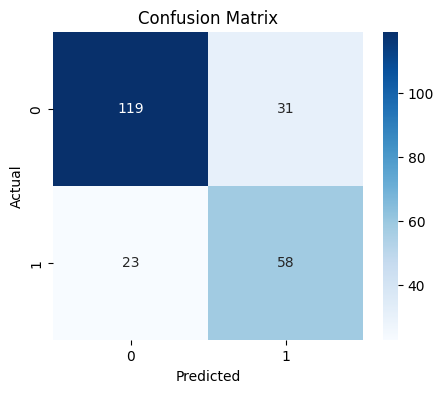

In [34]:
# Confusion matrix (print and plot)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

* `Explanation of each line:`

* `cm = confusion_matrix(y_test, y_pred)`
     * Computes the confusion matrix using:
     * y_test → actual/true labels
     * y_pred → predicted labels from the model
    * The resulting matrix looks like:



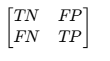

* `Where:`
     * TN → True Negative (actual 0, predicted 0)
     * FP → False Positive (actual 0, predicted 1)
     * FN → False Negative (actual 1, predicted 0)
     * TP → True Positive (actual 1, predicted 1)
     * Stored in variable cm.

* `print("Confusion matrix:\n", cm)`
     * Prints the confusion matrix array to the console.
     * Helps you see counts of correct and wrong predictions.

* Note: A Confusion Matrix is a table used to evaluate the performance of a classification model.
    * It compares:
     * Actual (true) values vs. Model’s predicted values

* `Why is it important?`
     * A confusion matrix tells you:
     * How many predictions are correct
     * Where the model is making mistakes

`* import seaborn as sns`

     * Imports Seaborn, a plotting library used to draw the heatmap.

* `sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])  `
     * Creates a heatmap visualization of the confusion matrix.

| Parameter           | Meaning                             |
| ------------------- | ----------------------------------- |
| `cm`                | The confusion matrix data           |
| `annot=True`        | Writes the numbers inside the boxes |
| `fmt="d"`           | Format numbers as integers (digits) |
| `cmap="Blues"`      | Color theme (blue gradient)         |
| `xticklabels=[0,1]` | Labels for predicted classes        |
| `yticklabels=[0,1]` | Labels for actual classes           |


* Note:
     * A heatmap is a type of visualization that uses colors to represent numbers.
     * In ml, we often use a heatmap to visualize the confusion matrix.
* `Why use a heatmap?`
     * Makes it easier to see patterns
     * Shows which values are high or low
     * Helps identify where the model is performing well or poorly

* `A heatmap will color:`

       * Bigger numbers → darker blue
       * Smaller numbers → lighter blue
       * So you can instantly see where the model performs best.

`Plot ROC curve`

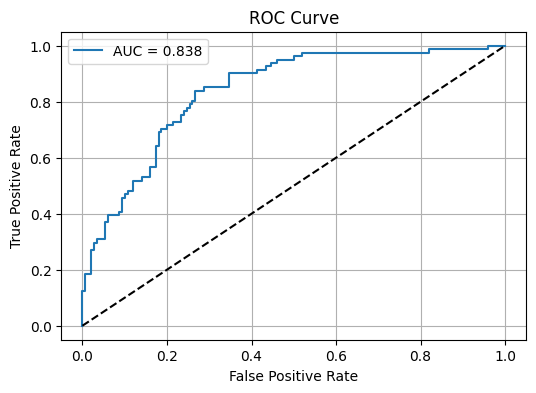

In [35]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

 `* Explanation`
1.  fpr, tpr, _ = roc_curve(y_test, y_proba)
     * This calculates data needed to draw the ROC curve.
     * roc_curve() returns three things:
     * fpr → False Positive Rate values at different thresholds

*  tpr → True Positive Rate values (also called recall or sensitivity)​
     * _ → the list of thresholds used
     * _ means “ignore this return value”.
     * This function basically tests every possible classification threshold (0 → 1) and computes how well the model performs at each.
2.  plt.figure(figsize=(6,4))
     * Creates a new blank figure (a plotting window).
     * figsize=(6,4) means width=6 inches, height=4 inches.
3. plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
     * Plots the ROC curve:
     * x-axis → false positive rate (bad predictions)
     * y-axis → true positive rate (good predictions)
     * Adds a label showing the AUC score (Area Under Curve), rounded to 3 decimals.
4.  plt.plot([0,1],[0,1],"k--")
     * Draws a diagonal dashed line (baseline classifier).
     * 'k--' means:
     * k = black color
     * -- = dashed line
     * This line represents random guessing.
     * A good model’s curve should stay above this line.
5.  plt.xlabel("False Positive Rate")
     * Sets the x-axis label.
     * plt.ylabel("True Positive Rate")
     * Sets the y-axis label.
     * plt.title("ROC Curve")
     * Adds the title on top of the plot.
6.  plt.legend()
     * Shows the legend box (containing the AUC score).
7.  plt.grid(True)
    * Adds grid lines to make reading easier.
8. plt.show()
    * Displays the ROC curve plot.

* `What is an ROC Curve?`

     * ROC stands for Receiver Operating Characteristic.
     * The ROC curve is a graph that shows how well a classification model performs at all possible classification thresholds.
* `It plots:`

     * True Positive Rate (TPR) on the Y-axis
     * False Positive Rate (FPR) on the X-axis

* True Positive Rate (TPR) . Also called Recall or Sensitivity:

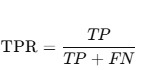

* Measures how many actual diabetics the model correctly identifies.

`* False Positive Rate (FPR)`

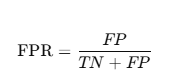

* `FPR: Measures how many healthy patients the model incorrectly labels as diabetic.`

* `Why Do We Use the ROC Curve in ML?`
1. It shows the model's performance at all thresholds
     * Logistic Regression outputs probabilities (like 0.80, 0.45, 0.10…).
     * But you must choose a threshold (default = 0.5) to convert probability → class (0 or 1).
     * The ROC curve shows how performance changes if you:
     * Lower the threshold (more 1’s predicted)
     * Increase the threshold (fewer 1’s predicted)
2. It helps evaluate imbalanced datasets
     * If diabetic = 1 is rare, accuracy alone is misleading.
     * ROC curve works well even with imbalance.

4. Helps compare models
     * If you build multiple models:
     * Logistic Regression
     * Random Forest
     * SVM
     * You can compare their ROC curves and AUC values to choose the best one.
* `Good model → goes up toward the top-left corner`
     * (high TPR, low FPR)
* `Bad model → stays near diagonal`
     * (random guessing)


*  ` Interpretation`
    * Accuracy: overall correct fraction; can be misleading if classes imbalanced.
    * Precision: of predicted positives, how many truly positive (important when false positives costly).
    * Recall (sensitivity): of actual positives, how many we detect (important for screening — we often want high recall).
    * ROC-AUC: threshold-independent measure of model ability to separate classes.

`Calibration & thresholding (practical for clinical decision)`

In [36]:
from sklearn.calibration import calibration_curve
#import numpy as np
# Example: check calibration
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
# If you want to change the decision threshold:
threshold = 0.4  # lower threshold to increase sensitivity
y_pred_thresh = (y_proba >= threshold).astype(int)
print("Metrics at threshold", threshold)
print("Precision:", precision_score(y_test, y_pred_thresh))
print("Recall:", recall_score(y_test, y_pred_thresh))

Metrics at threshold 0.4
Precision: 0.6181818181818182
Recall: 0.8395061728395061


*   Note
     * For screening in primary care, you may accept more false positives (lower threshold) because those flagged will receive lifestyle advice or further testing rather than invasive treatment.

`Save model & preprocessor for deployment`

In [ ]:
pipeline = Pipeline([clf_pipeline])

`Quick single-patient prediction`

In [37]:
# Build a sample patient (use original feature names)
sample = pd.DataFrame([{
    "Pregnancies": 1,
    "Glucose": 140,
    "BloodPressure": 80,
    "SkinThickness": 25,
    "Insulin": 120,
    "BMI": 30.5,
    "DiabetesPedigreeFunction": 0.6,
    "Age": 52
}])
proba = clf_pipeline.predict_proba(sample)[0][1]
predicted_class = int(proba >= 0.5)
print("Predicted probability of diabetes:", round(proba,3))
print("Predicted class (0=non-diabetic,1=diabetic):", predicted_class)


Predicted probability of diabetes: 0.512
Predicted class (0=non-diabetic,1=diabetic): 1


`What it does:`

     * Uses a threshold of 0.5:
     * If probability ≥ 0.5 → class = 1 (diabetic)
     * Otherwise → class = 0 (non-diabetic)
     * Converts the True/False result into an integer (1 or 0).